To bring the ROC curve to life, we’ll calculate TPR and FPR at various thresholds. Let’s start with importing the libraries required for this demo.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

Next, we will generate a binary classification dataset using the make-classification() function, with 1000 samples and 20 features.

In [2]:
# Generate a binary classification dataset
X ,y =  make_classification(n_samples=1000, n_features = 20 , n_classes = 2 , random_state = 42)


Let’s divide the dataset into training and test data–we’ll train the model on training set and measure its performance on the unseen test dataset.



In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Next, we define the model object by calling the LogisticRegression() class and then train it using the fit method on the training data, where X_train has the features and y_train represents the labels.

In [4]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Now, the model is trained and ready to generate predictions. We call the predict_proba() function to generate the probability of a positive class. We use the predict() method to compute evaluation metrics such as accuracy, precision, recall, and F1-score.

In [5]:
# Predict the probabilities for the test set
y_probs = model.predict_proba(X_test)[:, 1]

# Predict the classes for the test set
y_pred = model.predict(X_test)

In [6]:
# Calculate the AUC-ROC score
roc_auc = roc_auc_score(y_test , y_probs)

# calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"AUC - ROC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

AUC - ROC Score: 0.95
Accuracy: 0.87
Precision: 0.93
Recall: 0.84
F1 Score: 0.88


Now, let’s visualize the ROC curve along with the diagonal line representing a random chance model. To compute this, we require FPR and TPR for every discrete threshold between 0 and 1. In the graph below, the orange curve represents the ROC and the area under this curve is 0.93.

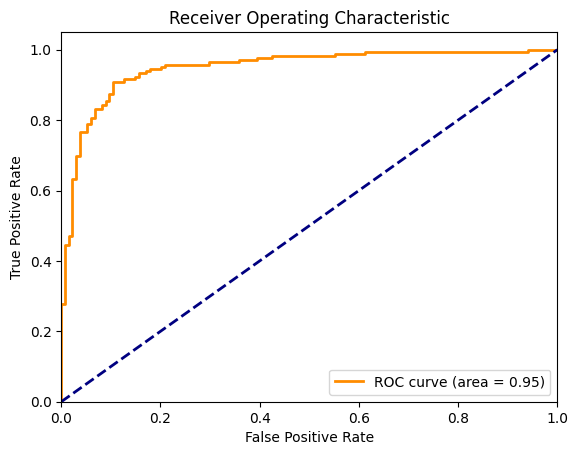

In [7]:
# Plotting the ROC Curve
fpr , tpr , thresholds = roc_curve(y_test , y_probs)
roc_auc = auc(fpr , tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Choosing the Best Algorithm using the ROC Curve
Now, let’s use the same dataset and compare the performance of four classification algorithms using ROC. We will start by importing the RandomForestClassifier, KNeighborsClassifier, and SVC and compare these with the LogisticRegression.



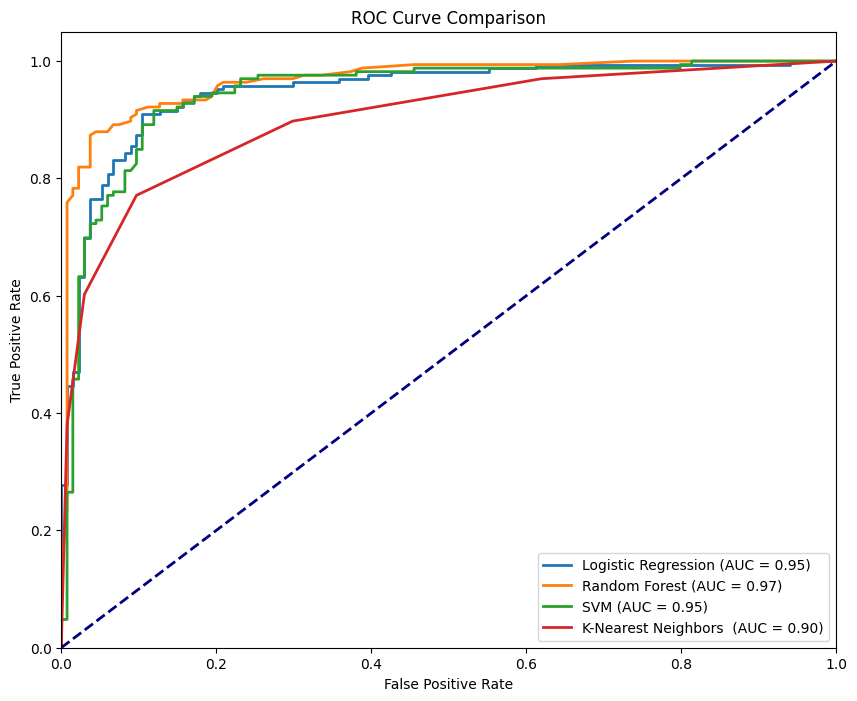

Logistic Regression: AUC - ROC = 0.95
Random Forest: AUC - ROC = 0.97
SVM: AUC - ROC = 0.95
K-Nearest Neighbors : AUC - ROC = 0.90


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Define the model
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'SVM' : SVC(probability=True),
    'K-Nearest Neighbors ': KNeighborsClassifier()
}

# Initialize a dictionary to store AUC - ROC scores
roc_auc_scores = {}

#plot the ROC curve
plt.figure(figsize=(10,8))

for name , model in models.items():
    # train model
    model.fit(X_train , y_train)

    #predict the probabities
    y_probs = model.predict_proba(X_test)[:,1]

    # Calculate the AUC - ROC Score
    roc_auc = roc_auc_score(y_test, y_probs)
    roc_auc_scores[name] = roc_auc

    # Compute ROC Curve
    fpr , tpr , _ =  roc_curve(y_test, y_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')


# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC - ROC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC - ROC = {score:.2f}')